In [197]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

In [198]:
xr.__version__

'2024.3.0'

In [200]:
ncd = xr.open_mfdataset("outC0S0B0/d/d_*.nc", data_vars="minimal", combine='by_coords', parallel=True )
ncd

<xarray.Dataset> Size: 3MB
Dimensions:    (longitude: 610, latitude: 552)
Coordinates:
    time       int64 8B 0
  * longitude  (longitude) float64 5kB 161.4 161.5 161.7 ... 242.3 242.5 242.6
  * latitude   (latitude) float64 4kB 66.87 66.73 66.6 ... -6.333 -6.467 -6.6
Data variables:
    d          (latitude, longitude) float64 3MB dask.array<chunksize=(276, 204), meta=np.ndarray>

Text(0.5, 1.0, 'Bathymetry')

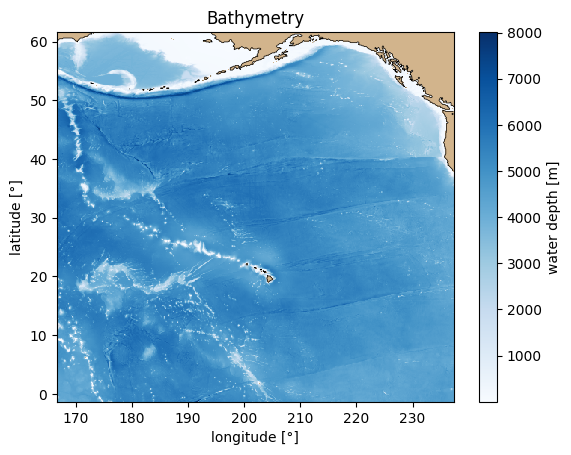

In [201]:
dep0 = ncd.d[40:-40,40:-40].copy()
depN = dep0.copy()
depN.data[depN.data==0]=np.nan
cmap=plt.cm.Blues
cmap.set_bad("tan")
fig,ax=plt.subplots()
depN.plot(ax=ax,cmap=cmap)
dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
ax.set_title("Bathymetry")

In [203]:
nchmax = xr.open_mfdataset("outC0S0B0/hmax/*.nc", data_vars="minimal", combine='by_coords', parallel=True )
hmax = nchmax.hmax[40:-40,40:-40].copy()
hmax.data[dep0.data==0]=np.nan

Text(0.5, 1.0, 'Maximum tsunami height')

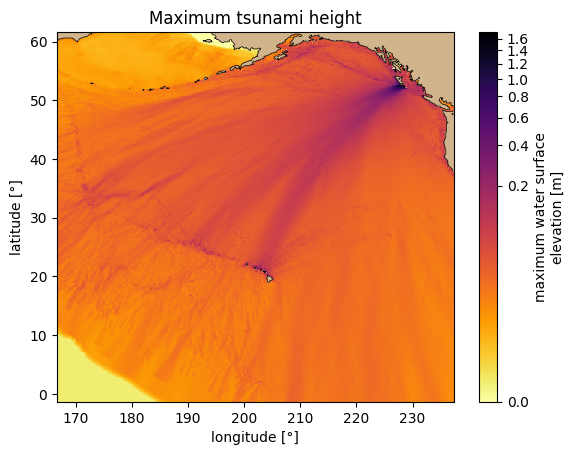

In [204]:
cmap = plt.cm.inferno_r
cmap.set_bad("tan")
fig, ax = plt.subplots()
hmax.plot(ax=ax, cmap=cmap, norm=colors.PowerNorm(0.25))
dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
ax.set_title("Maximum tsunami height")

In [205]:
nch = xr.open_mfdataset("outC0S0B0/h/*.nc", data_vars="minimal", combine='by_coords', parallel=True )
nch

<xarray.Dataset> Size: 970MB
Dimensions:    (time: 360, longitude: 610, latitude: 552)
Coordinates:
  * time       (time) float64 3kB 0.0 30.0 60.0 ... 1.074e+04 1.077e+04
  * longitude  (longitude) float64 5kB 161.4 161.5 161.7 ... 242.3 242.5 242.6
  * latitude   (latitude) float64 4kB 66.87 66.73 66.6 ... -6.333 -6.467 -6.6
Data variables:
    h          (time, latitude, longitude) float64 970MB dask.array<chunksize=(120, 276, 204), meta=np.ndarray>

(6, 472, 530) (472, 530)


<Figure size 1200x500 with 0 Axes>

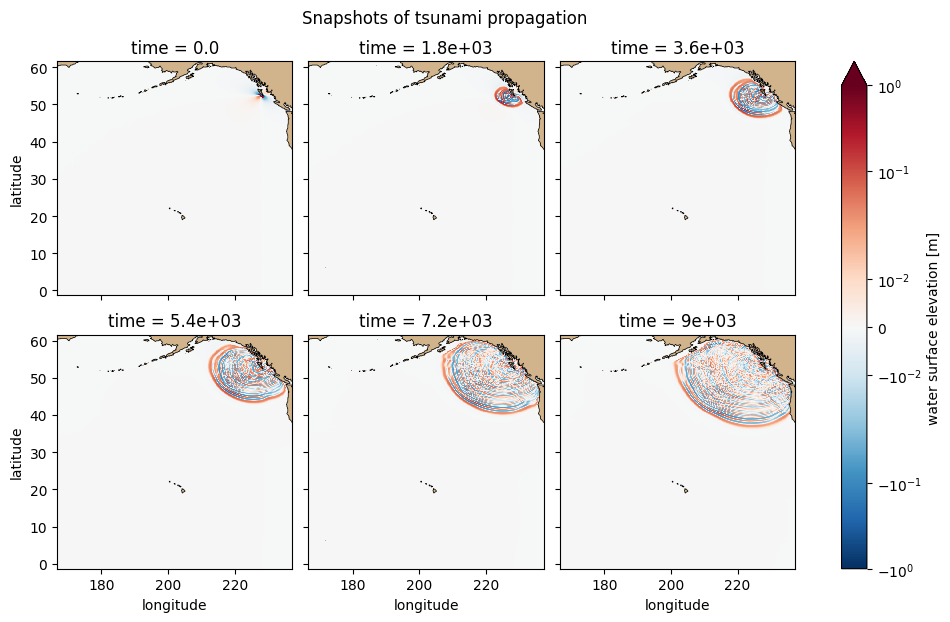

In [206]:
h = nch.h[:,40:-40,40:-40].isel(time=slice(0,360,60)).copy()
print(h.data.shape, dep0.data.shape)
h.data[dep0.data==0]=np.nan
cmap = plt.cm.RdBu_r
cmap.set_bad("tan")
fig = plt.figure(figsize=(12,5))
axs = h.plot(x="longitude", y="latitude", col="time", cmap=cmap, col_wrap=3, 
             norm=colors.SymLogNorm(linthresh=0.02, vmin=-1, vmax=1),
            )
for ax in axs.axs.ravel():
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    title = ax.get_title()
    dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
fig.tight_layout()
plt.suptitle("Snapshots of tsunami propagation", x=0.45, y=1.03)
plt.show()

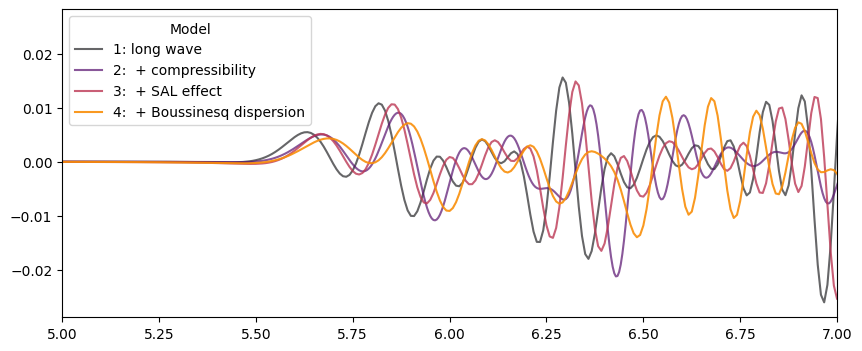

In [196]:
w1 = np.load("./outC0S0B0/timeseries00_station0011.npz")
w2 = np.load("./outC1S0B0/timeseries00_station0011.npz")
w3 = np.load("./outC1S1B0/timeseries00_station0011.npz")
w4 = np.load("./outC1S1B1/timeseries00_station0011.npz")
plt.figure(figsize=(10,4))
cmap = plt.cm.inferno
plt.plot(w1["t"]/3600, w1["h"], label="1: long wave", c=cmap(0/4), alpha=0.6)
plt.plot(w2["t"]/3600, w2["h"], label="2:  + compressibility", c=cmap(1/4), alpha=0.7)
plt.plot(w3["t"]/3600, w3["h"], label="3:  + SAL effect", c=cmap(2/4), alpha=0.8)
plt.plot(w4["t"]/3600, w4["h"], label="4:  + Boussinesq dispersion", c=cmap(3/4), alpha=0.9)
plt.xlim(5,7)
#plt.ylim(-0.025,0.025)
plt.legend(loc="upper left", title="Model")